In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image
from qgis.gui import *
from qgis import processing

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\\OSGeo4W64\\apps\\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/ASUS/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/ASUS/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
path= r"C:\Users\ASUS\Desktop\Trabalho_SIG\US\states_21basic\states.shp"
map_layer = QgsVectorLayer(path, 'mapa_us', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [4]:
csv_path = r"file:///C:\Users\ASUS\Desktop\Trabalho_SIG\US\us-states.csv?delimiter=,'"

csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [5]:
QgsProject.instance().addMapLayer(map_layer)
QgsProject.instance().addMapLayer(csv_layer)
csv_iso='state'
shp_iso='STATE_NAME'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csv_iso)
joinObject.setTargetFieldName(shp_iso)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_layer)
map_layer.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('mapa_us')[0]

# Checking if all columns were uploaded
for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column STATE_NAME Load
Column DRAWSEQ Load
Column STATE_FIPS Load
Column SUB_REGION Load
Column STATE_ABBR Load
Column Data_date Load
Column Data_fips Load
Column Data_cases Load
Column Data_deaths Load


Imprime mapa com cores consoante num caso espero eu

In [6]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "Data_cases"

text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

52.48444904887995
Gerar mapa com 1000 por 1000


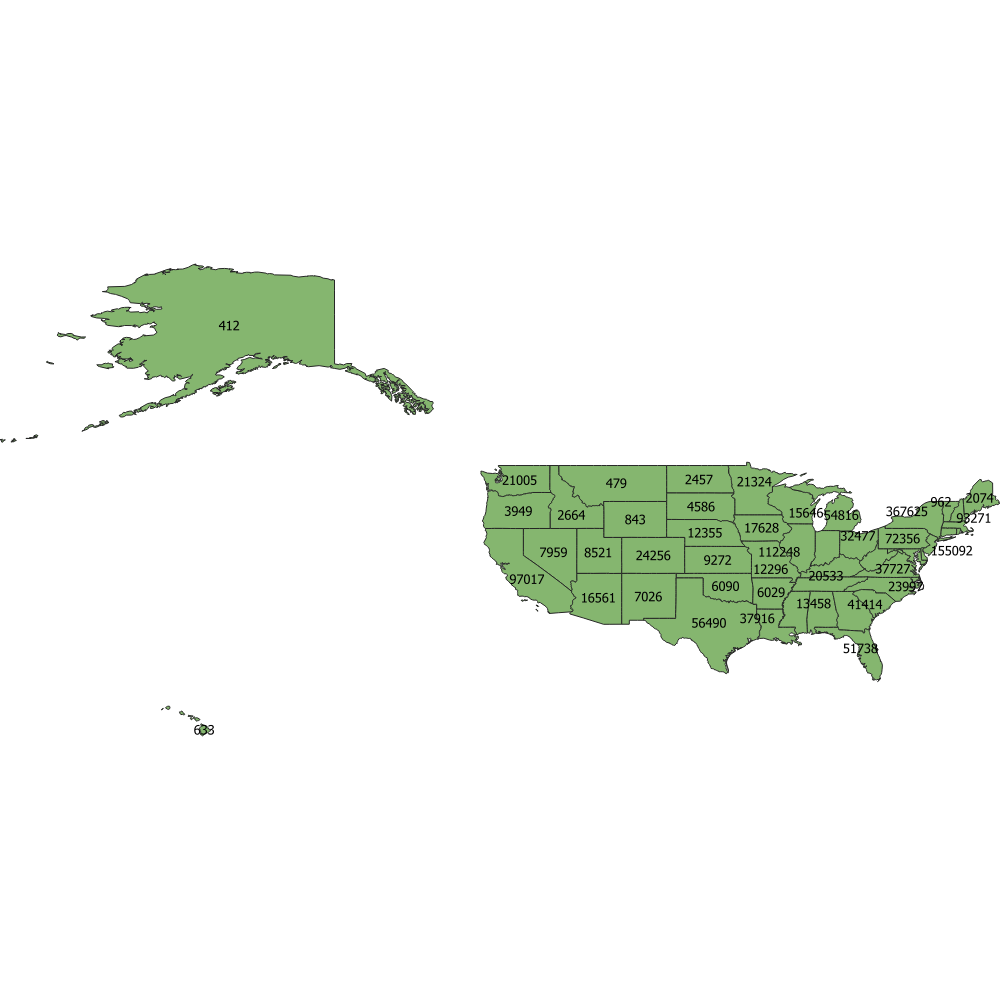

In [7]:
vlayer = QgsProject.instance().mapLayersByName('mapa_us')[0]
xt = vlayer.extent()

print(xt.height())
width  = 1000
height = 1000
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )